In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:
df = pd.read_csv("FIFA_raw_data.csv", low_memory=False)

In [13]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [15]:
df.describe()


,Age,↓OVA,POT,ID,BOV,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,25.194583,65.718636,71.136098,226404.790242,66.751620,5.417461,248.938616,49.688551,45.842932,51.941883,...,16.217609,16.519205,1595.293851,355.703040,67.454239,53.457716,57.681069,62.875494,49.865904,64.368618
std,4.710753,6.968999,6.114176,27141.673349,6.747017,5.663954,74.299764,18.131334,19.566978,17.293626,...,17.002134,17.854185,269.883542,40.762282,10.678058,13.827229,10.081914,9.927875,16.442730,9.601665
min,16.000000,47.000000,47.000000,41.000000,48.000000,0.000000,42.000000,6.000000,3.000000,5.000000,...,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,21.000000,61.000000,67.000000,210135.000000,62.000000,0.000000,222.000000,38.000000,30.000000,44.000000,...,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,25.000000,66.000000,71.000000,232424.000000,67.000000,4.000000,263.000000,54.000000,49.000000,55.000000,...,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,29.000000,70.000000,75.000000,246925.500000,71.000000,9.000000,297.000000,63.000000,62.000000,64.000000,...,14.000000,14.000000,1781.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,53.000000,93.000000,95.000000,259216.000000,93.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [16]:
df.isnull().sum().sort_values(ascending=False).head(20)

Loan Date End      17966
LongName               0
playerUrl              0
Nationality            0
photoUrl               0
Name                   0
Age                    0
↓OVA                   0
POT                    0
Team & Contract        0
ID                     0
Height                 0
Positions              0
Weight                 0
foot                   0
BP                     0
BOV                    0
Growth                 0
Joined                 0
Value                  0
dtype: int64

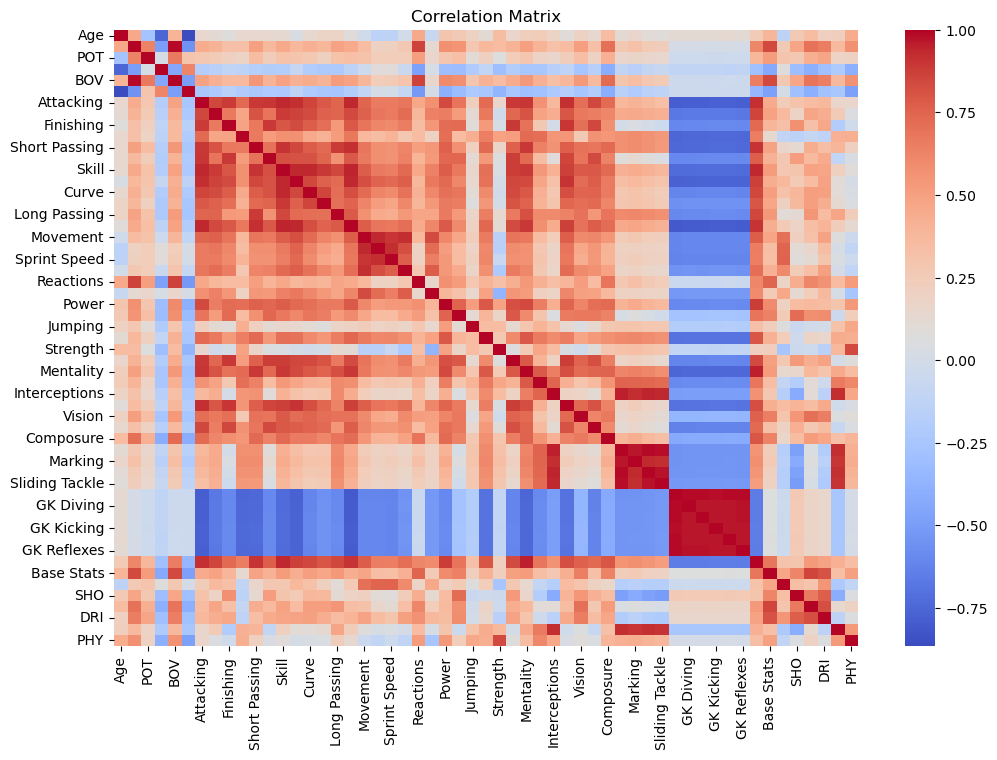

In [17]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

# Правильные названия колонок для датасета FIFA
cluster_features = ['Age', '↓OVA', 'POT', 'Wage', 'Value']

# Правильный способ выбрать колонки
X = df[cluster_features].dropna()

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Преобразование обратно в DataFrame для удобства (опционально)
X_scaled_df = pd.DataFrame(X_scaled, columns=cluster_features, index=X.index)

print(f"Размерность исходных данных: {X.shape}")
print(f"Размерность масштабированных данных: {X_scaled.shape}")
print("\nПервые 5 строк масштабированных данных:")
print(X_scaled_df.head())

Размерность исходных данных: (18979, 5)
Размерность масштабированных данных: (18979, 5)

Первые 5 строк масштабированных данных:
        Age      ↓OVA       POT       Wage      Value
0  1.656980  3.914778  3.576030  28.213667  12.804571
1  2.081552  3.771281  3.412471  10.810584   8.586801
2  0.383264  3.627785  3.576030   5.947958  14.275886
3  0.807836  3.627785  3.248913  18.488415  16.629991
4  0.595550  3.627785  3.248913  13.369861  17.218517


### K-Means

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))

Silhouette Score: 0.3337059848176267


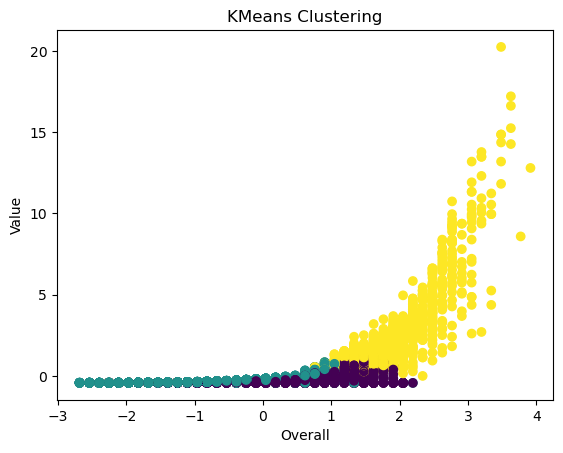

In [27]:
plt.scatter(X_scaled[:,1], X_scaled[:,4], c=kmeans_labels)
plt.xlabel("Overall")
plt.ylabel("Value")
plt.title("KMeans Clustering")
plt.show()

### Hierarchical Clustering

In [28]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled)

print("Silhouette Score:", silhouette_score(X_scaled, agg_labels))

Silhouette Score: 0.31411393279180466


### DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

print("Silhouette Score:", silhouette_score(X_scaled, db_labels))

Silhouette Score: 0.8025198199288426


## №3.Описание кластеров с визуализацией

In [29]:
# Добавим колонку с номером кластера в нашу таблицу с масштабированными данными
X_scaled_df['Cluster'] = kmeans_labels

# Посмотрим средние значения характеристик для каждого кластера
cluster_description = X_scaled_df.groupby('Cluster').mean()
print("Средние значения для каждого кластера:")
print(cluster_description)

Средние значения для каждого кластера:
              Age      ↓OVA       POT      Wage     Value
Cluster                                                  
0        0.824219  0.219968 -0.495047 -0.138796 -0.192012
1       -0.862741 -0.617983  0.117810 -0.307783 -0.296154
2        0.236024  1.698925  1.547500  1.871836  2.042555


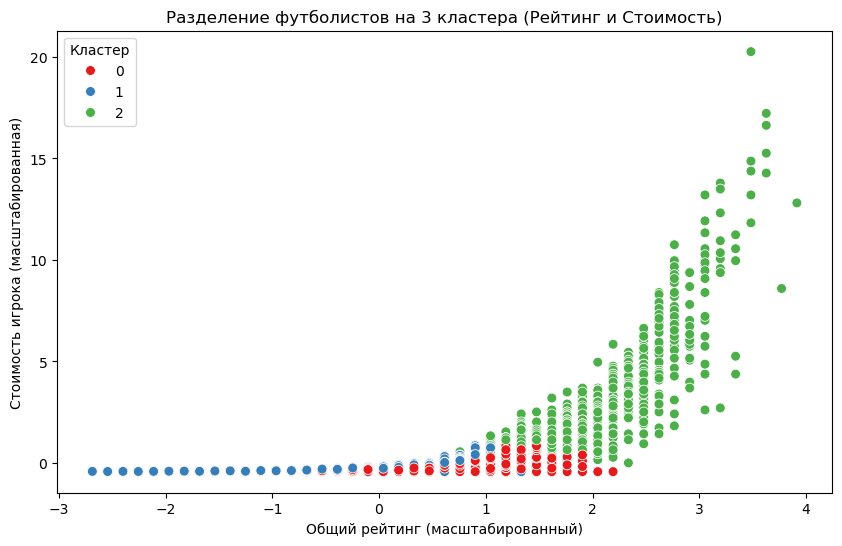

In [30]:
#Рисуем график, чтобы увидеть кластеры
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(x='↓OVA', y='Value', hue='Cluster', data=X_scaled_df, palette='Set1', s=50)

plt.title('Разделение футболистов на 3 кластера (Рейтинг и Стоимость)')
plt.xlabel('Общий рейтинг (масштабированный)')
plt.ylabel('Стоимость игрока (масштабированная)')
plt.legend(title='Кластер')
plt.show()

Вывод по кластерам:
Кластер 0 (Красные точки): Средние игроки. У них средний рейтинг и невысокая стоимость. Их в датасете большинство.

Кластер 1 (Синие точки): Игроки с низким рейтингом и самой низкой ценой. Возможно, это начинающие игроки или игроки из слабых лиг.

Кластер 2 (Зеленые точки): "Суперзвезды". Это игроки с самым высоким рейтингом и очень высокой стоимостью. Их мало, но они самые дорогие.

## №4. Создание модели классификации (3 метода) и сохранение

In [32]:
# Импортируем нужные инструменты для классификации
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
X = X_scaled 
y = kmeans_labels
# Делим данные на обучающую (80%) и тестовую (20%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Метод 1: Логистическая регрессия
log_model = LogisticRegression()
log_model.fit(X_train, y_train) # Обучаем
log_predictions = log_model.predict(X_test) # Предсказываем
log_accuracy = accuracy_score(y_test, log_predictions) # Оцениваем

# Метод 2: Дерево решений
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)

# Метод 3: Случайный лес
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_predictions)

# Выводим результаты
print(f"1. Логистическая регрессия: {log_accuracy:.4f}")
print(f"2. Дерево решений: {tree_accuracy:.4f}")
print(f"3. Случайный лес: {forest_accuracy:.4f}")

1. Логистическая регрессия: 0.9966
2. Дерево решений: 0.9929
3. Случайный лес: 0.9947


In [36]:
# Сохранение лучшей модели
filename = 'my_best_player_classifier.pkl'
joblib.dump(log_model, filename)

print(f"Модель успешно сохранена в файл: {filename}")

Модель успешно сохранена в файл: my_best_player_classifier.pkl


### Интерактивный дашборд (5 визуализаций, 3 фильтра)

In [34]:
!pip install dash plotly

### Код дашборда

### Callback

In [7]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import numpy as np

# ===== ЗАГРУЗКА ДАННЫХ =====
# Загружаем данные из файла
df = pd.read_csv('FIFA_raw_data.csv')
print(f"Данные загружены! {len(df)} строк")

# Подготовка данных
df_dash = df.copy()
df_dash['Club'] = df_dash['Team & Contract'].str.split('\n').str[1].str.strip()
df_dash['Main Position'] = df_dash['Positions'].str.split().str[0]
df_dash['Preferred Foot'] = df_dash['foot']

# ===== СОЗДАНИЕ APP =====
app = dash.Dash(__name__)

# ===== LAYOUT (ДИЗАЙН) =====
app.layout = html.Div([
    html.H1("FIFA Player Analysis Dashboard", 
            style={'textAlign': 'center', 'color': '#2c3e50', 'fontSize': 36}),
    
    # Фильтры
    html.Div([
        html.Div([
            html.Label("Возраст:", style={'fontWeight': 'bold'}),
            dcc.RangeSlider(
                id='age_filter', 
                min=15, max=45, 
                value=[20, 30], 
                marks={i: str(i) for i in range(15, 46, 5)}
            )
        ], style={'width': '32%', 'display': 'inline-block', 'padding': '10px'}),
        
        html.Div([
            html.Label("Клуб:", style={'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='club_filter', 
                options=[{'label': 'Все клубы', 'value': 'All'}] + 
                        [{'label': c, 'value': c} for c in df_dash['Club'].dropna().unique()[:30]], 
                value='All'
            )
        ], style={'width': '32%', 'display': 'inline-block', 'padding': '10px'}),
        
        html.Div([
            html.Label("Рейтинг (OVA):", style={'fontWeight': 'bold'}),
            dcc.RangeSlider(
                id='ova_filter', 
                min=40, max=99, 
                value=[70, 90],
                marks={i: str(i) for i in range(40, 100, 10)}
            )
        ], style={'width': '32%', 'display': 'inline-block', 'padding': '10px'}),
    ]),
    
    # Графики
    html.Div([
        dcc.Graph(id='scatter_plot', style={'width': '50%', 'display': 'inline-block'}),
        dcc.Graph(id='hist_age', style={'width': '50%', 'display': 'inline-block'}),
    ]),
    
    html.Div([
        dcc.Graph(id='bar_positions', style={'width': '33%', 'display': 'inline-block'}),
        dcc.Graph(id='box_value', style={'width': '33%', 'display': 'inline-block'}),
        dcc.Graph(id='pie_nationality', style={'width': '33%', 'display': 'inline-block'}),
    ])
])

# ===== CALLBACK =====
@app.callback(
    [Output('scatter_plot', 'figure'),
     Output('hist_age', 'figure'),
     Output('bar_positions', 'figure'),
     Output('box_value', 'figure'),
     Output('pie_nationality', 'figure')],
    [Input('age_filter', 'value'),
     Input('club_filter', 'value'),
     Input('ova_filter', 'value')]
)
def update_graphs(age_range, club, ova_range):
    # Фильтрация данных
    filtered = df_dash[
        (df_dash['Age'] >= age_range[0]) &
        (df_dash['Age'] <= age_range[1]) &
        (df_dash['↓OVA'] >= ova_range[0]) &
        (df_dash['↓OVA'] <= ova_range[1])
    ]
    
    if club != 'All':
        filtered = filtered[filtered['Club'] == club]
    
    # Если после фильтрации нет данных
    if len(filtered) == 0:
        filtered = df_dash.head(1)  # заглушка
    
    # 1. Scatter plot - стоимость vs рейтинг
    fig1 = px.scatter(
        filtered, x='↓OVA', y='Value', 
        hover_data=['LongName', 'Age'], 
        opacity=0.5,
        title='Стоимость vs Рейтинг',
        labels={'↓OVA': 'Рейтинг', 'Value': 'Стоимость (€)'},
        color='↓OVA',
        color_continuous_scale='Viridis'
    )
    fig1.update_layout(title_x=0.5)
    
    # 2. Гистограмма возраста
    fig2 = px.histogram(
        filtered, x='Age', nbins=20,
        title='Распределение возраста',
        color_discrete_sequence=['#3498db']
    )
    fig2.update_layout(title_x=0.5, showlegend=False)
    
    # 3. Топ-10 позиций
    if len(filtered) > 0:
        top_pos = filtered['Main Position'].value_counts().head(10).reset_index()
        top_pos.columns = ['Position', 'Count']
    else:
        top_pos = pd.DataFrame({'Position': ['Нет данных'], 'Count': [0]})
    
    fig3 = px.bar(
        top_pos, y='Position', x='Count', 
        orientation='h',
        title='Топ-10 позиций', 
        color='Count',
        color_continuous_scale='Blues'
    )
    fig3.update_layout(title_x=0.5)
    
    # 4. Box plot стоимости
    fig4 = px.box(
        filtered, y='Value', 
        title='Распределение стоимости',
        color_discrete_sequence=['#2ecc71']
    )
    fig4.update_layout(title_x=0.5)
    
    # 5. Топ-8 национальностей
    if len(filtered) > 0:
        top_nat = filtered['Nationality'].value_counts().head(8).reset_index()
        top_nat.columns = ['Country', 'Count']
    else:
        top_nat = pd.DataFrame({'Country': ['Нет данных'], 'Count': [1]})
    
    fig5 = px.pie(
        top_nat, values='Count', names='Country',
        title='Топ-8 национальностей',
        color_discrete_sequence=px.colors.qualitative.Set3
    )
    fig5.update_layout(title_x=0.5)
    
    return fig1, fig2, fig3, fig4, fig5

# ===== ЗАПУСК =====
if __name__ == '__main__':
    print("Запуск дашборда... Откройте браузер по адресу http://127.0.0.1:8050/")
    app.run(debug=True)

C:\Users\gospo\AppData\Local\Temp\ipykernel_1268\1322829530.py:9: DtypeWarning:

Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.



Данные загружены! 18979 строк
Запуск дашборда... Откройте браузер по адресу http://127.0.0.1:8050/
